<a href="https://colab.research.google.com/github/eruinsoftweb/Linea_Enfasis3-Markdown-_Colab_Taller-2/blob/Taller-1-Final/taller1_Eruin_Pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heroes

In [1]:
# libreria para análisis de datos
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Archivo CSV con los datos
origen_datos = 'https://paste.c-net.org/FiendGreer'

In [3]:
# Crear un dataframe con los datos, el CSV tiene separador (;)
df = pd.read_csv(origen_datos, sep=';')

In [4]:
# ver el dataframe, las primeras 5 filas
df.head()

,Name,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
0,A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
1,Abraxas,Abraxas,Within Eternity,Marvel Comics,NaN,NaN,M,NaN,Blue,Black,100.0,high
2,Abomination,Emil Blonsky,"Zagreb, Yugoslavia",Marvel Comics,203.04,441.98,M,NaN,Green,No Hair,80.0,good
3,Adam Monroe,NaN,NaN,NBC - Heroes,NaN,NaN,M,NaN,Blue,Blond,10.0,good
4,Agent 13,Sharon Carter,NaN,Marvel Comics,173.41,61.03,F,NaN,Blue,Blond,NaN,NaN


# Obtener los metadatos

In [5]:
df.shape # -> (filas, columnas)

(735, 12)

In [ ]:
# nombre de las columnas
df.columns

In [7]:
# tipos de datos
df.dtypes

Name                 object
Identity             object
Birth place          object
Publisher            object
Height              float64
Weight              float64
Gender               object
First appearance    float64
Eye color            object
Hair color           object
Strength            float64
Intelligence         object
dtype: object

In [8]:
# metadatos del dataframe: columna, datos no nulos y tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              735 non-null    object 
 1   Identity          632 non-null    object 
 2   Birth place       317 non-null    object 
 3   Publisher         720 non-null    object 
 4   Height            518 non-null    float64
 5   Weight            498 non-null    float64
 6   Gender            706 non-null    object 
 7   First appearance  367 non-null    float64
 8   Eye color         563 non-null    object 
 9   Hair color        563 non-null    object 
 10  Strength          609 non-null    float64
 11  Intelligence      609 non-null    object 
dtypes: float64(4), object(8)
memory usage: 69.0+ KB


In [9]:
# cuántos datos nulos (faltantes) hay en cada columna
df.isnull().sum()

Name                  0
Identity            103
Birth place         418
Publisher            15
Height              217
Weight              237
Gender               29
First appearance    368
Eye color           172
Hair color          172
Strength            126
Intelligence        126
dtype: int64

In [10]:
# cuáles son los valores únicos en el Género
df.Gender.unique()

array(['M', 'F', nan], dtype=object)

In [11]:
# lista de columnas categoricas
categoricas = ['Publisher', 'Gender', 'Eye color', 'Hair color', 'Intelligence']
numericas = ['Height', 'Weight', 'Strength']

In [12]:
# Valores únicos en cada columna
for col in categoricas:
    print(f"{col}: {df[col].unique()}")

Publisher: ['Marvel Comics' 'NBC - Heroes' 'Dark Horse Comics' 'DC Comics'
 'Image Comics' 'HarperCollins' 'George Lucas' 'Shueisha' 'Team Epic TV'
 nan 'ABC Studios' 'Star Trek' 'J. R. R. Tolkien' 'Icon Comics' 'SyFy'
 'IDW Publishing' 'Sony Pictures' 'Wildstorm' 'Microsoft' 'Rebellion'
 'Titan Books' 'J. K. Rowling' 'Universal Studios' 'South Park'
 'Hanna-Barbera']
Gender: ['M' 'F' nan]
Eye color: ['Yellow' 'Blue' 'Green' 'Brown' nan 'Grey' 'Red' 'White' 'Black' 'Gold'
 'Violet' 'Amber' 'Hazel' 'Purple' 'brown' 'Bown' 'Yellow / Blue' 'Indigo'
 'blue' 'Yellow (without irises)' 'White / Red' 'Green / Blue'
 'Blue / White' 'Yellow / Red' 'Silver']
Hair color: ['No Hair' 'Black' 'Blond' 'White' 'Brown' nan 'Strawberry Blond' 'Auburn'
 'Silver' 'Red' 'Black / Blue' 'black' 'Red / White' 'Purple' 'Orange'
 'Brown / White' 'Green' 'Grey' 'blond' 'Indigo' 'Red / Orange' 'Gold'
 'Brownn' 'Yellow' 'Blue' 'Orange / White' 'Red / Grey' 'Brown / Black'
 'Magenta' 'Pink']
Intelligence: ['moderate

In [13]:
# resumen estadístico, variables numéricas
df[numericas].describe()

,Height,Weight,Strength
count,518.000000,498.000000,609.000000
mean,187.235077,112.447671,45.008210
std,59.185250,103.964283,33.031458
min,15.340000,2.340000,5.000000
25%,173.935000,61.827500,10.000000
50%,183.235000,81.750000,35.000000
75%,190.495000,107.767500,80.000000
max,975.370000,900.700000,100.000000


Adicionemos una nueva columna con el `IMC` (Indice de Masa Corporal) de cada heroe:

$$ ICM = \frac {peso (kg)}{ altura^2 (m)} $$

Nota: la columna altura está en centímetros, el IMC utiliza metros.

In [14]:
# Adicionar la columna 'IMC'


# Gráficas de uso común

array([[<Axes: title={'center': 'Weight'}>]], dtype=object)

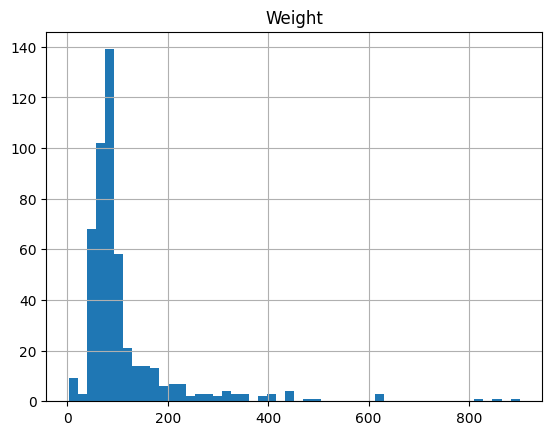

In [15]:
# Histograma, como están distribuidos los datos
df[['Weight']].hist(bins=50)

<Axes: >

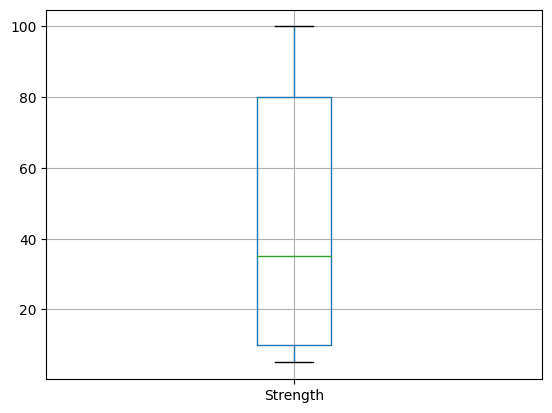

In [16]:
# Boxplot, muestra la mediana, mínimo, máximo y cuartiles
df[['Strength']].boxplot()

In [17]:
# resumen estadístico, variables categóricas
df[categoricas].describe()

,Publisher,Gender,Eye color,Hair color,Intelligence
count,720,706,563,563,609
unique,24,2,24,29,5
top,Marvel Comics,M,Blue,Black,good
freq,388,506,219,159,247


<Axes: >

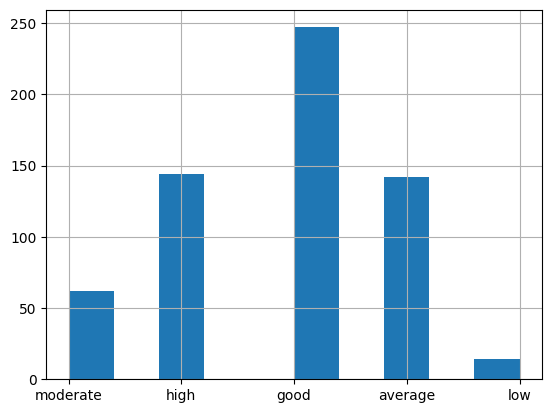

In [18]:
# Histograma, para variables categóricas
df['Intelligence'].hist()

# Cómo se distribuyen las editoriales?


In [19]:
# Agrupar por editorial y contar
df_pub = df.groupby(['Publisher'])['Publisher'].count()
df_pub

Publisher
ABC Studios            4
DC Comics            216
Dark Horse Comics     18
George Lucas          14
Hanna-Barbera          1
HarperCollins          6
IDW Publishing         4
Icon Comics            4
Image Comics          14
J. K. Rowling          1
J. R. R. Tolkien       1
Marvel Comics        388
Microsoft              1
NBC - Heroes          19
Rebellion              1
Shueisha               4
Sony Pictures          2
South Park             1
Star Trek              6
SyFy                   5
Team Epic TV           5
Titan Books            1
Universal Studios      1
Wildstorm              3
Name: Publisher, dtype: int64

<Axes: ylabel='Publisher'>

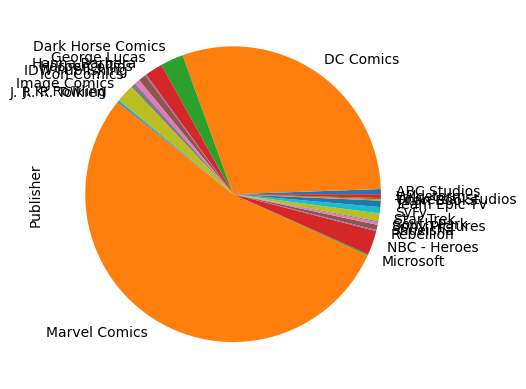

In [20]:
# método plot.pie() del dataframe
df_pub.plot.pie()

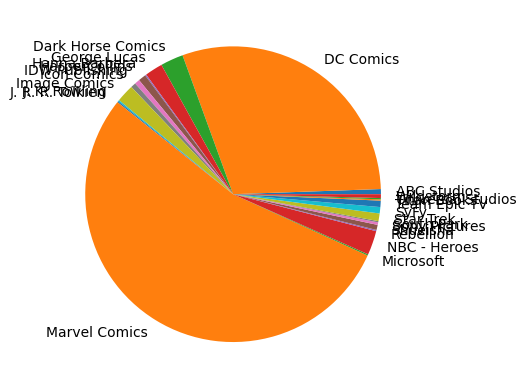

In [21]:
# pie() de Matplotlib
plt.pie(df_pub, labels=df_pub.index);

Los gráficos no son muy útiles, hay dos grupos muy grandes y muchos muy pequeños. Es mejor agrupar todos los pequeños en un solo.

In [22]:
# vamos a agrupar los que tienen menos de 100 en 'Otros'
grupo_otros = df_pub[ df_pub < 100 ]
# guardamos la suma como el valor de los agrupados
valor_otros = grupo_otros.sum()

In [23]:
# borramos las filas del grupo 'Otros'
df_pub.drop(index=grupo_otros.index, inplace=True)
df_pub

Publisher
DC Comics        216
Marvel Comics    388
Name: Publisher, dtype: int64

In [24]:
# creamos la nueva fila: Otros con valor_otros
otros = pd.Series([valor_otros], index=['Otros'])
otros

Otros    116
dtype: int64

In [25]:
# agregamos el grupo Otros a los datos que quedaron (Marvel y DC)
df_pub = pd.concat([df_pub, otros])
df_pub

DC Comics        216
Marvel Comics    388
Otros            116
dtype: int64

<Axes: >

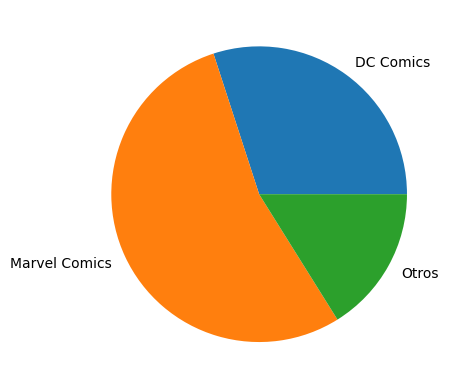

In [26]:
df_pub.plot.pie()

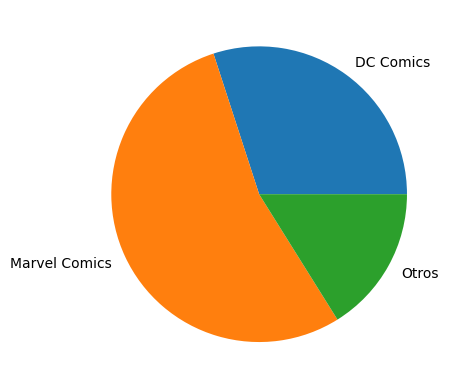

In [27]:
plt.pie(df_pub, labels=df_pub.index);

# Cómo es la Fuerza con respecto al Género

<Axes: title={'center': 'Strength'}, xlabel='[Gender]'>

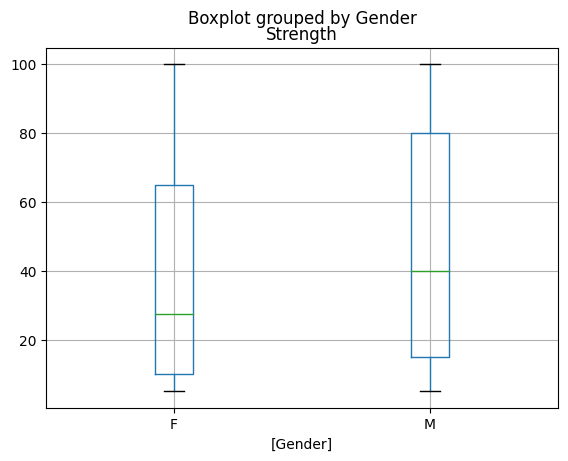

In [28]:
# Cómo es la Fuerza con respecto al Género
df[ ['Gender', 'Strength'] ].boxplot(by='Gender')

# Cómo es la Inteligencia con respecto al Género?

In [29]:
# Agrupar Inteligencia por género, y contar
# renombrar la nueva columna a 'Cantidad', si no, se llamaría 'Gender' también y habría 2 con el mismo nombre
# convertir en un dataframe, y resetear los indices
df_int = df.groupby(['Gender', 'Intelligence'])['Gender'].count().rename('Cantidad').to_frame().reset_index()
df_int

,Gender,Intelligence,Cantidad
0,F,average,38
1,F,good,78
2,F,high,27
3,F,moderate,21
4,M,average,101
5,M,good,165
6,M,high,112
7,M,low,13
8,M,moderate,37


# Cuáles son los 10 heroes más fuertes?

In [30]:
FUERZA = df.nlargest(10, 'Strength')[['Name', 'Strength']]
print(FUERZA)

             Name  Strength
0          A-Bomb     100.0
1         Abraxas     100.0
9          Angela     100.0
28   Wonder Woman     100.0
30           Ymir     100.0
39     Wonder Man     100.0
60         Vegeta     100.0
71         Trigon     100.0
90         Thanos     100.0
101          Thor     100.0


# Cuáles son los 10 heroes (hombres) más débiles en 'DC Comics'?

In [31]:

DEBILES = df[(df['Gender'] == 'M') & (df['Publisher'] == 'DC Comics')].nsmallest(10, 'Strength')[['Name', 'Strength']]
print(DEBILES)

             Name  Strength
367     Kid Flash       5.0
15           Zoom      10.0
26   Adam Strange      10.0
45           Warp      10.0
69       Two-Face      10.0
79           Vibe      10.0
118        Static      10.0
177     Scarecrow      10.0
180     Rorschach      10.0
184       Robin V      10.0


# Cuáles son los 10 heroes más inteligentes?

In [32]:

heroes_inteligentes = df[df['Intelligence'] == 'high'][['Name', 'Intelligence']]

heroes_inteligentes = heroes_inteligentes.sort_values(by='Intelligence', ascending=False).head(10)
print(heroes_inteligentes)

                Name Intelligence
1            Abraxas         high
7         Abe Sapien         high
455  Granny Goodness         high
461     Green Goblin         high
466          Giganta         high
472      Green Arrow         high
474      General Zod         high
480         Galactus         high
487         Flash II         high
488     Flash Gordon         high


# Cuáles son los 10 heroinas más inteligentes en 'Marvel Comics'?


In [33]:
heroinas_inteligentes_high = df[(df['Publisher'] == 'Marvel Comics') & (df['Gender'] == 'F') & (df['Intelligence'] == 'high')].head(10)

table_heroinas_inteligentes_high = heroinas_inteligentes_high[['Name', 'Intelligence']].reset_index(drop=True)
table_heroinas_inteligentes_high.index += 1
table_heroinas_inteligentes_high.columns = ['Nombre', 'Inteligencia']
table_heroinas_inteligentes_high

,Nombre,Inteligencia
1,Valkyrie,high
2,Shadowcat,high
3,Scarlet Witch,high
4,She-Hulk,high
5,Phoenix,high
6,Lady Bullseye,high
7,Jean Grey,high
8,Invisible Woman,high
9,Cat,high
10,Captain Marvel,high


# Quién tiene más heroes con fuerza mayor a 90, DC o Marvel?

In [34]:

conteo_dc_fuerza_mayor_90 = df[(df['Publisher'] == 'DC Comics') & (df['Strength'] > 90)].shape[0]


conteo_marvel_fuerza_mayor_90 = df[(df['Publisher'] == 'Marvel Comics') & (df['Strength'] > 90)].shape[0]

print(f"Cantidad de héroes con fuerza mayor a 90 en DC Comics: {conteo_dc_fuerza_mayor_90}")
print(f"Cantidad de héroes con fuerza mayor a 90 en Marvel Comics: {conteo_marvel_fuerza_mayor_90}")

Cantidad de héroes con fuerza mayor a 90 en DC Comics: 35
Cantidad de héroes con fuerza mayor a 90 en Marvel Comics: 31


# Basados en el IMC, cuántos heroes hay en cada categoría?

| Categoría | IMC |
|:---------:|:---:|
|Peso inferior al normal|menor a 18.5|
|Normal|18.5 - 24.9|
|Peso superior al normal|25.0 – 29.9|
|Obesidad|mayor a 30.0|

In [ ]:

def calcular_imc(peso, altura):
    altura_metros = altura / 100
    imc = peso / (altura_metros ** 2)
    return imc



df['IMC'] = df.apply(lambda row: calcular_imc(row['Weight'], row['Height']), axis=1)


categorias_imc = {
    'Inferior': (0, 18.4),
    'Normal': (18.5, 24.9),
    'Superior': (25.0, 29.9),
    'Obesidad': (30.0, float('inf'))
}


conteo_categorias = {categoria: 0 for categoria in categorias_imc}

for categoria, (limite_inferior, limite_superior) in categorias_imc.items():
    heroes_en_categoria = df[(df['IMC'] >= limite_inferior) & (df['IMC'] <= limite_superior)]
    conteo_categorias[categoria] = len(heroes_en_categoria)


for categoria, conteo in conteo_categorias.items():
    print(f"{categoria}: {conteo} héroes")

# Cómo se distribuye la creación de heroes a traves del tiempo?

<ipython-input-45-4322a66039b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Año_creacion'] = df['Año_creacion'].astype(int)


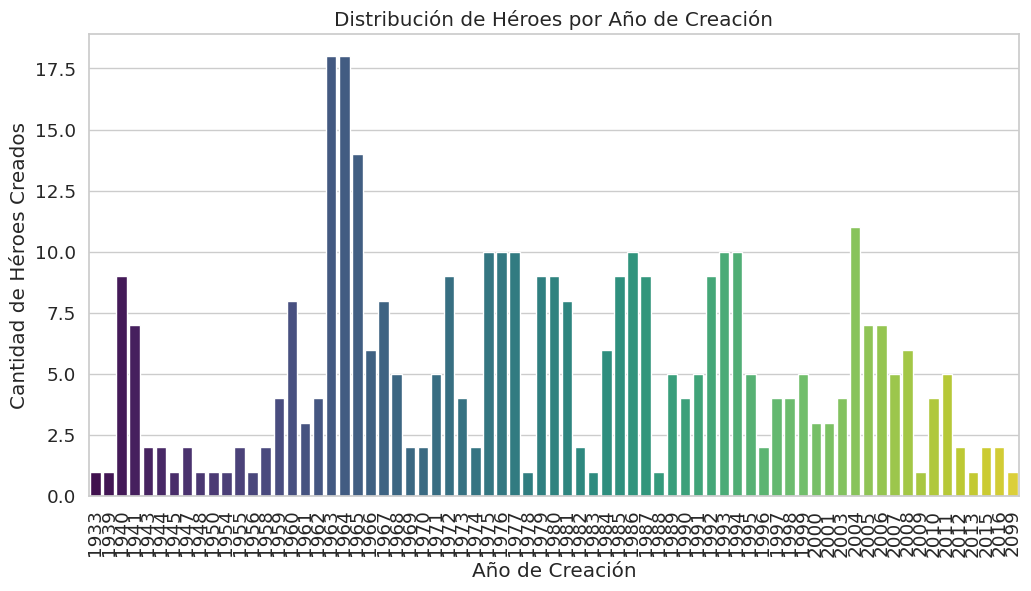

In [45]:
import seaborn as sns

df['First appearance'] = df['First appearance'].astype(str)

df['Año_creacion'] = df['First appearance'].str.extract(r'(\d{4})')

#filtrar años validos
df = df[df['Año_creacion'].notna()]



df['Año_creacion'] = df['Año_creacion'].astype(int)

conteo_por_año = df['Año_creacion'].value_counts().sort_index()

#estilos
sns.set(style="whitegrid", font_scale=1.2)

#graafico
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_por_año.index, y=conteo_por_año.values, palette="viridis")
plt.xlabel('Año de Creación')
plt.ylabel('Cantidad de Héroes Creados')
plt.title('Distribución de Héroes por Año de Creación')
plt.xticks(rotation=90)
plt.show()


Escriba **5 Preguntas adicionales diferentes a las anteriores** y respondalas:

# Pregunta 1: ¿Cuántos héroes tienen ojos de color verde y cabello negro en 'Marvel Comics'?

In [37]:

cabello_ojos = df[(df['Publisher'] == 'Marvel Comics') & (df['Eye color'] == 'Green') & (df['Hair color'] == 'Black')]


contador_cabello_ojos = len(cabello_ojos)
print(f'Número de héroes con ojos verdes y cabello negro en Marvel Comics: {contador_cabello_ojos}')


nombres_cabello_ojos = cabello_ojos['Name'].tolist()
print('Nombres de los héroes:')
for name in nombres_cabello_ojos:
    print(name)



Número de héroes con ojos verdes y cabello negro en Marvel Comics: 8
Nombres de los héroes:
X-23
Spider-Woman
Skaar
Ripcord
Mantis
Loki
Hela
Black Mamba


# Pregunta 2:  ¿Cómo se distribuyen las editoriales ('Publisher') en términos de la cantidad de héroes creados?

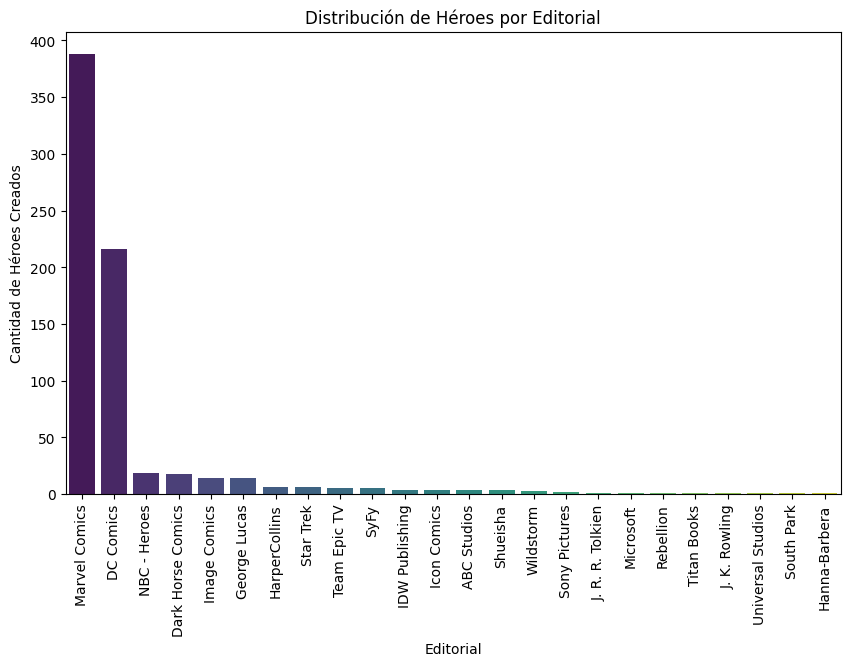

In [38]:
import seaborn as sns

publisher_distribution = df['Publisher'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_distribution.index, y=publisher_distribution.values, palette='viridis')
plt.xlabel('Editorial')
plt.ylabel('Cantidad de Héroes Creados')
plt.title('Distribución de Héroes por Editorial')
plt.xticks(rotation=90)
plt.show()


# Pregunta 3: ¿Cuál es la distribución de género de los héroes en el conjunto de datos?

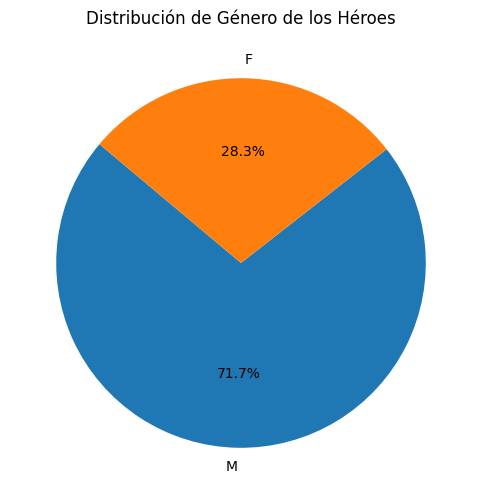

In [39]:
generos = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(generos, labels=generos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Género de los Héroes')
plt.show()

# Pregunta 4:  ¿Cuál es el héroe más pesado en 'DC Comics'?

In [40]:
heaviest_dc_hero = df[(df['Publisher'] == 'DC Comics')].nlargest(1, 'Weight')[['Name', 'Weight']]
heaviest_dc_hero

,Name,Weight
548,Darkseid,817.57


# Pregunta 5:  ¿Cuántas heroínas tienen ojos de color azul y cabello rubio en 'Marvel Comics'?

In [41]:

heroinas_cabello_ojos = df[(df['Publisher'] == 'Marvel Comics') & (df['Gender'] == 'F') & (df['Eye color'] == 'Blue') & (df['Hair color'] == 'Blond')]


contador_heroinas_cabello_ojos = len(heroinas_cabello_ojos)
print(f'Número de heroínas con ojos azules y cabello rubio en Marvel Comics: {contador_heroinas_cabello_ojos}')


nombres_heroinas_cabello_ojos = heroinas_cabello_ojos['Name'].tolist()
print('Nombres de las heroínas:')
for name in nombres_heroinas_cabello_ojos:
    print(name)


Número de heroínas con ojos azules y cabello rubio en Marvel Comics: 23
Nombres de las heroínas:
Agent 13
White Queen
Warbird
Valkyrie
Ultragirl
Thor Girl
Spider-Gwen
Namorita
Namora
Moonstone
Mockingbird
Meltdown
Jennifer Kale
Husk
Emma Frost
Dazzler
Dagger
Cat
Captain Marvel
Boom-Boom
Black Widow II
Binary
Arachne
